In [15]:
import pandas as pd
from pathlib import Path
from sqlalchemy.engine import create_engine
import numpy as np

import dbcp

In [2]:
pudl_path = Path('../data/data_cache/pudl-v0.5.0-2021-11-14/pudl_data/sqlite/pudl.sqlite')
assert pudl_path.exists()
pudl_engine = create_engine(f"sqlite:///{pudl_path}")

In [3]:
postgres_engine = dbcp.helpers.get_sql_engine()

## Load county_wide

In [4]:
cw = pd.read_csv('../data/output/county_wide_deck.csv')

In [5]:
cw.head(2)

,has_ordinance,state_permitting_type,county_total_co2e_tonnes_per_year,fossil_existing_capacity_mw,fossil_existing_co2e_tonnes_per_year,fossil_existing_facility_count,fossil_proposed_capacity_mw,fossil_proposed_co2e_tonnes_per_year,fossil_proposed_facility_count,renewable_existing_capacity_mw,...,pct_college_grad_2022_voters,pct_gender_female_2022_voters,pct_race_aapi_2022_voters,pct_race_black_2022_voters,pct_race_latinx_2022_voters,pct_race_white_2022_voters,county,county_short,state,state_abbrev
0,False,Local,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.0,...,0.348,0.522,0.032,0.012,0.389,0.555,San Benito County,San Benito,California,CA
1,False,Hybrid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,...,0.463,0.489,0.042,0.027,0.119,0.797,Washoe County,Washoe,Nevada,NV


In [6]:
[col for col in cw.columns if col.startswith('renewable')]

['renewable_existing_capacity_mw',
 'renewable_existing_co2e_tonnes_per_year',
 'renewable_existing_facility_count',
 'renewable_proposed_capacity_mw',
 'renewable_proposed_facility_count']

In [11]:
[col for col in cw.columns if 'total' in col]

['county_total_co2e_tonnes_per_year',
 'infra_total_proposed_co2e_tonnes_per_year',
 'infra_total_proposed_facility_count',
 'infra_total_proposed_nox_tonnes_per_year',
 'infra_total_proposed_pm2_5_tonnes_per_year',
 'cvap_total',
 'households_total']

In [8]:
[col for col in cw.columns if 'biden' in col]

['pres_2020_votes_biden', 'pres_2020_percent_biden']

In [9]:
[col for col in cw.columns if 'minority' in col]

['cvap_minority_percent']

In [12]:
clean_mw = 'renewable_proposed_capacity_mw'
co2 = 'county_total_co2e_tonnes_per_year'
partisan = 'pres_2020_percent_biden'
diversity = 'cvap_minority_percent'

## Examine Bin sizing

### Clean MW

<AxesSubplot:>

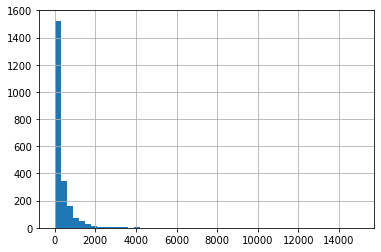

In [13]:
cw[clean_mw].hist(bins=50)

<AxesSubplot:>

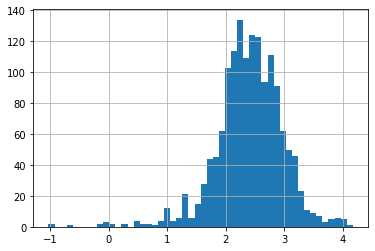

In [17]:
cw[clean_mw].replace(0, np.nan).transform(np.log10).hist(bins=50)

In [31]:
cutoffs_clean = [-1e-6, 0, 10**1.5, 10**2, 10**2.9, 10**3.5, np.inf]
cutoffs_clean

[-1e-06,
 0,
 31.622776601683793,
 100,
 794.3282347242813,
 3162.2776601683795,
 inf]

In [33]:
pd.cut(cw[clean_mw], cutoffs_clean).value_counts().sort_index()

(-1e-06, 0.0]          740
(0.0, 31.623]           80
(31.623, 100.0]        234
(100.0, 794.328]       935
(794.328, 3162.278]    217
(3162.278, inf]         33
Name: renewable_proposed_capacity_mw, dtype: int64

### CO2

<AxesSubplot:>

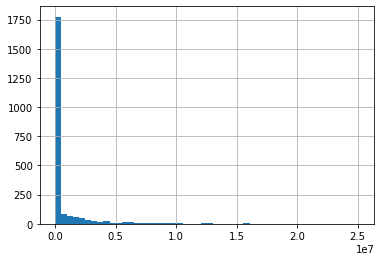

In [34]:
cw[co2].hist(bins=50)

<AxesSubplot:>

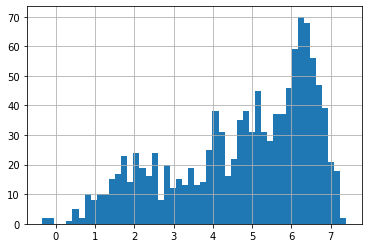

In [35]:
cw[co2].replace(0, np.nan).transform(np.log10).hist(bins=50)

In [38]:
cutoffs_co2 = [-1e-6, 0, 10**3, 10**4.5, 10**5.5, 10**6.5, np.inf]
cutoffs_co2

[-1e-06,
 0,
 1000,
 31622.776601683792,
 316227.7660168379,
 3162277.6601683795,
 inf]

In [39]:
pd.cut(cw[co2].abs(), cutoffs_co2).value_counts().sort_index()

(-1e-06, 0.0]               1082
(0.0, 1000.0]                237
(1000.0, 31622.777]          198
(31622.777, 316227.766]      218
(316227.766, 3162277.66]     333
(3162277.66, inf]            171
Name: county_total_co2e_tonnes_per_year, dtype: int64

### Partisanship

<AxesSubplot:>

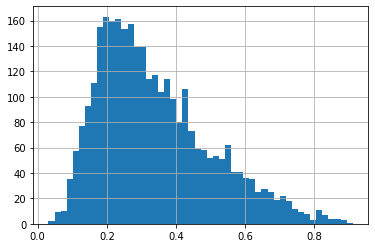

In [44]:
cw[partisan].hist(bins=50)

In [46]:
cutoffs_partisan = [0.2 * n for n in range(6)]
cutoffs_partisan

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]

In [47]:
pd.cut(cw[partisan], cutoffs_partisan).value_counts().sort_index()

(0.0, 0.2]     651
(0.2, 0.4]    1509
(0.4, 0.6]     699
(0.6, 0.8]     224
(0.8, 1.0]      30
Name: pres_2020_percent_biden, dtype: int64

### Diversity

<AxesSubplot:>

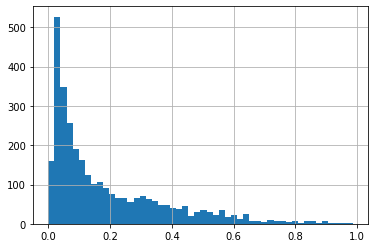

In [48]:
cw[diversity].hist(bins=50)

<AxesSubplot:>

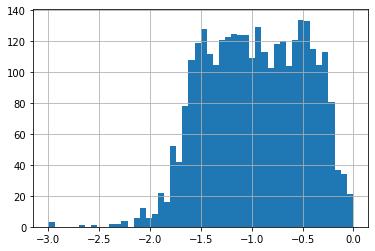

In [51]:
cw[diversity].replace(0, np.nan).transform(np.log10).hist(bins=50)

In [53]:
cutoffs_diversity = [0, 10**-1.5, 0.15, 0.3, 0.6, 1]
cutoffs_diversity

[0, 0.03162277660168379, 0.15, 0.3, 0.6, 1]

In [54]:
pd.cut(cw[diversity], cutoffs_diversity).value_counts().sort_index()

(0.0, 0.0316]      482
(0.0316, 0.15]    1350
(0.15, 0.3]        575
(0.3, 0.6]         589
(0.6, 1.0]         138
Name: cvap_minority_percent, dtype: int64